# Investigating Titanic Dataset
## Introduction
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this dataset we will analyze the chance of survival of passengers based on various factors

## About the dataset

The dataset Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. More information about this dataset can be found on the Kaggle website, where the data was obtained. There are 891 rows and 12 columns in the dataset
Columns in the dataset.

Columns in the dataset and their description
- PassengerId - Id of the passengers ranging from 1 to 890.
- Survived - Tells if the passengers survived or not, 0 stands for not survived and 1 for survived.
- Pclass - Ticket class, It is the proxy for Socio Economic status, 1 = 1st; 2 = 2nd; 3 = 3rd class respectively.
- Name - Name of the passenger.
- Sex - Sex of the passenger.
- Age - Age of the passenger in years.
- SibSp - # of siblings / spouses aboard the Titanic.
- Parch - # of parents / children aboard the Titanic.
- Ticket - Ticket number.
- Fare - Passenger fare
- Cabin - Cabin number
- Embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

## Questions 
- What is the total number of passenger survived? 
- What is the total number of males and female survived.Is it based on the total number of males and females onboarded?
- Does age plays as an important factor for passenger survival?
- What class of passenger survived.Is survival corelated with the class of passenger?
- What are the fators that affects passengers survival rate?
- How does the number of parents/children and siblings/spouces relate to the survival rate?


In [174]:
#Libraries Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [175]:
#importing the csv files
titanic_df = pd.read_csv("C:/Users/Abhinav/Documents/Python/Titanic/titanic-data.csv")

In [176]:
#Checking the data conatined in the csv fie
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [177]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above information we can see that the age, cabin and embarked have missing values.Cabin column is missing a lot of values

In [178]:
#Details about the data set
passengers_onboard = len(titanic_df)
print "Passengers Onboard = {}".format(passengers_onboard)
#Number of males and females
print '\nNumbers of males and female onboard'
print titanic_df['Sex'].value_counts()
#Passengers based on embarked
print "\n Passengers count from embarked point"
print titanic_df['Embarked'].value_counts() #2 people embarked was missing

#Passengers based on Pclass
print "\n Passengers count based on class of ticket"
print titanic_df['Pclass'].value_counts().reset_index()

Passengers Onboard = 891

Numbers of males and female onboard
male      577
female    314
Name: Sex, dtype: int64

 Passengers count from embarked point
S    644
C    168
Q     77
Name: Embarked, dtype: int64

 Passengers count based on class of ticket
   index  Pclass
0      3     491
1      1     216
2      2     184


In [179]:
#Passengers Survived

passengers_survived=titanic_df['Survived'].value_counts().reset_index()
passengers_survived.columns = ['Survived', 'Count']
print passengers_survived

print '\nPassengers with siblings count'
print titanic_df['SibSp'].value_counts()

print '\nPassengers with parents count'
print titanic_df['Parch'].value_counts()


   Survived  Count
0         0    549
1         1    342

Passengers with siblings count
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Passengers with parents count
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [180]:
#Age Distribution with missing values
titanic_df.Age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

In [181]:
#Age distribution when missing values are replaced by median
titanic_df.Age.fillna(titanic_df.Age.median()).value_counts().head()

28.0    202
24.0     30
22.0     27
18.0     26
19.0     25
Name: Age, dtype: int64

# Handling Missing Values in  column
## Age -There are 177 values missing in the age column


In [182]:
missing_age = pd.isnull(titanic_df['Age'])
missing_age_male = titanic_df[missing_age]['Sex'] == 'male'
missing_age_female = titanic_df[missing_age]['Sex'] == 'female'

print "There are {} values missing from the Age column for males and \
{} values missing for females.".format(missing_age_male.sum(), missing_age_female.sum())

There are 124 values missing from the Age column for males and 53 values missing for females.


[ 22.    38.    26.    35.      nan  54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.
  59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.
  55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.
  41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.
   0.75  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42
  34.5   74.  ]
28.0
count    891.000000
mean      29.345679
std       13.028212
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


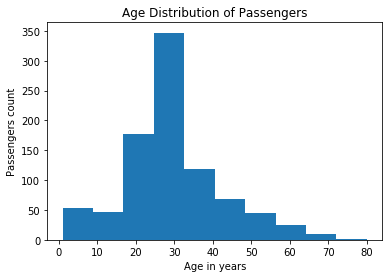

In [183]:
#Median age of people who onboard

print titanic_df['Age'].unique()
median_age = titanic_df['Age'].median()
print median_age

#Found nan values and float values in age
#Assign nan to mean because age cannot be nan and mean value will not affect the dataset

titanic_df['Age'] = titanic_df['Age'].fillna(median_age)

#Coverting age to integers
titanic_df['Age'] = titanic_df['Age'].astype(int)
print titanic_df['Age'].describe()

#Coverting Age indicating 0 to 1
titanic_df.loc[titanic_df.Age == 0, 'Age'] = 1

plt.hist(titanic_df['Age'])
plt.xlabel('Age in years', fontsize=10)
plt.ylabel('Passengers count')
plt.title('Age Distribution of Passengers')

## Cabin -Handling the missing values in the cabin column
Cabin only conatins 204 values out of 891 so creating a new column that will indicate whether the passenger has cabin or not might be useful. 

Create a new boolean column Cabin_provided if the passenger conatins value in the cabin coumn.This will alow us to check whether 
cabin, an important factor for survival.

In [184]:

titanic_df['Has_Cabin'] = titanic_df[['Cabin']].applymap(lambda x: 0 if pd.isnull(x) else 1)
print titanic_df['Has_Cabin'].value_counts()
titanic_df.head()

0    687
1    204
Name: Has_Cabin, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


## Embarked -Handling the missing values in Embarked column

There are two values missing in the embarked column.
### Questions
- Which passengers are missing those values
- Can we able to predict those two values
- Will theses values affect our analyses

In [185]:
#Boolean list to store the missing values
missing_embarked = pd.isnull(titanic_df['Embarked'])
titanic_df[missing_embarked]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN,1


The above data indicates similarity between both the passengers.Both the passenger survived and colums like Pclass, Sex, Ticket,
Fare, Cabin has same values.This might lead to the fact that there is a high possibility that both the passengers were travelling from the
same Embarked port.

- Do we able to predict these values based on other first class passenger travelling from the three ports

3    491
1    216
2    184
Name: Pclass, dtype: int64

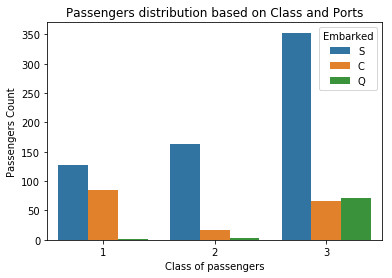

In [186]:
# Checking the mean, median and standard deviation value of fare for all the three ports for first class passengers.
sns.countplot(x="Pclass",hue ='Embarked', data=titanic_df)
plt.xlabel('Class of passengers', fontsize=10)
plt.ylabel('Passengers Count')
plt.title('Passengers distribution based on Class and Ports')
titanic_df['Pclass'].value_counts()

In [187]:
Pclass1_df = titanic_df.loc[(titanic_df['Pclass'] == 1)]

print Pclass1_df.groupby(['Embarked'])['Fare'].mean().reset_index()
print Pclass1_df.groupby(['Embarked'])['Fare'].median().reset_index()
print Pclass1_df.groupby(['Embarked'])['Fare'].std().reset_index()

  Embarked        Fare
0        C  104.718529
1        Q   90.000000
2        S   70.364862
  Embarked     Fare
0        C  78.2667
1        Q  90.0000
2        S  52.0000
  Embarked       Fare
0        C  99.093935
1        Q   0.000000
2        S  58.811278


We can see from above that the median value of class 1 paasenger for Embarked port C is closer to the fare of 2 passengers 
missing Embarked port. Therefore replacing the missing embarked port by 'C'.


In [188]:
titanic_df.loc[61, 'Embarked'] = 'C'
titanic_df.loc[829, 'Embarked'] = 'C'
missing_embarked = pd.isnull(titanic_df['Embarked'])
titanic_df[missing_embarked]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin


### Adding a new column Size_of_family which predict thet total members of family traveling together apart from passengers

In [189]:
titanic_df['Size_of_Family'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Size_of_Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0


## Adding three new columns which provide descriptive labels for Survived, Embarked and Pclass.These columns will provide a good visulization afterwards.

In [190]:
# Survival Label Column
titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_df.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [191]:
# Embarked Label Column
titanic_df['Ports'] = titanic_df.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
titanic_df.Ports.head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Ports, dtype: object

In [192]:
# Pclass Label Column
titanic_df['Class'] = titanic_df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic_df.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

## Exploration of titanic_data

## 1. Survival Based on Gender


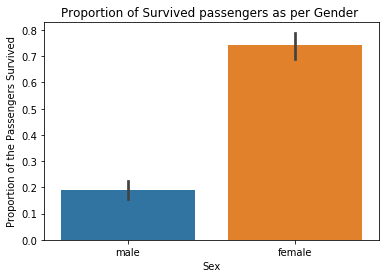

In [193]:
#Proportion based on total number of males and females onboarded and survived
sns.barplot(x='Sex', y='Survived',data=titanic_df)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Proportion of the Passengers Survived')
plt.title('Proportion of Survived passengers as per Gender ')


In [194]:
#Dataframe for passenger survived
passenger_survived_df = titanic_df.loc[(titanic_df['Survived'] == 1)]

female    233
male      109
Name: Sex, dtype: int64


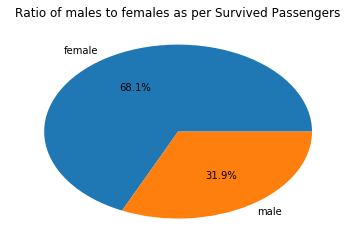

In [195]:
# Percentage of male and female survived based on number of passengers survived
plt.pie(passenger_survived_df['Sex'].value_counts(),labels =passenger_survived_df['Sex'].unique(),autopct='%1.1f%%')
plt.title('Ratio of males to females as per Survived Passengers')
print passenger_survived_df['Sex'].value_counts()

From the above plottings it is very clear that the chance of survival of female is better than the males.
68.1 percent of female survived and 31.9 percent of males survived out of 342 passengers who survived.

## 2. Survival based on Pclass

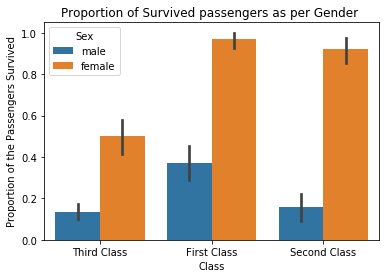

In [196]:
#Passengers Survived based on Pclass and Sex
sns.barplot(x='Class', y='Survived',hue ='Sex' ,data=titanic_df)
plt.ylabel('Proportion of the Passengers Survived')
plt.title('Proportion of Survived passengers as per Gender ')


First Class     136
Third Class     119
Second Class     87
Name: Class, dtype: int64


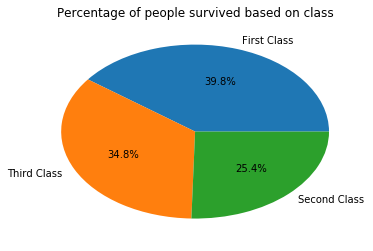

In [197]:
plt.pie(passenger_survived_df['Class'].value_counts(),labels =passenger_survived_df['Class'].unique(),autopct='%1.1f%%')
plt.title('Percentage of people survived based on class')
print passenger_survived_df['Class'].value_counts()

It look likes there is better chance of survival for first class passengers and most of them are females. 

## 3.Survival based on Age

count    891.000000
mean      29.353535
std       13.010784
min        1.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

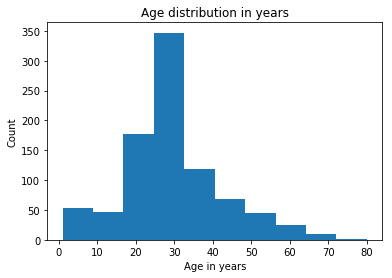

In [198]:
# Distribution of age of passengers onboarded
plt.hist(titanic_df['Age'])
plt.xlabel('Age in years', fontsize=10)
plt.ylabel('Count')
plt.title('Age distribution in years')
titanic_df['Age'].describe()

count    342.000000
mean      28.295322
std       13.753290
min        1.000000
25%       21.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

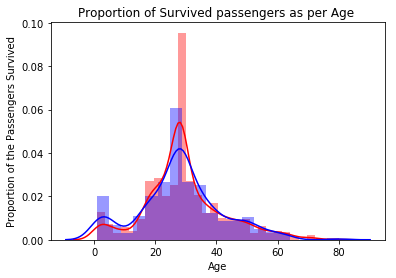

In [199]:
#Distribution of age based on passengers survived
sns.distplot(titanic_df['Age'], color = "red")
sns.distplot(titanic_df.loc[(titanic_df['Survived'] == 1)]['Age'], color = "blue")
plt.ylabel('Proportion of the Passengers Survived')
plt.title('Proportion of Survived passengers as per Age ')
passenger_survived_df['Age'].describe()


Look like chances of survival of passengers with age group between 0-20 is better than the others.

## 4.Survival based on Family Size

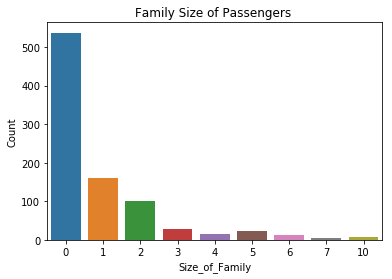

In [200]:
#Plotting count of passengers having siblings
sns.countplot(x="Size_of_Family", data=titanic_df)
plt.ylabel('Count')
plt.title('Family Size of Passengers ')

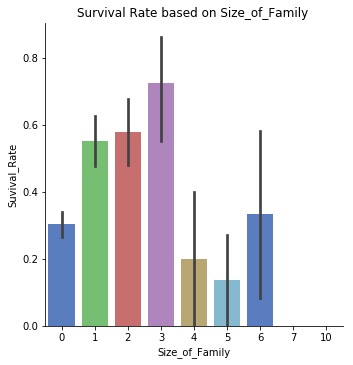

In [201]:
#Survived passengers based on Size_of_Famiy  
sns.factorplot(x="Size_of_Family", y="Survived", data=titanic_df,
                   size=5, kind="bar", palette="muted")
plt.ylabel('Suvival_Rate')
plt.title('Survival Rate based on Size_of_Family ')

Above plotting indicate that the small family holds a better chance of survival  

## 5. Survial based on Embarked Port and Pclass

S    644
C    170
Q     77
Name: Embarked, dtype: int64


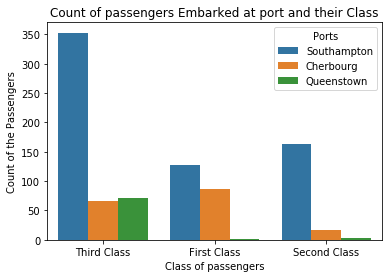

In [202]:
print titanic_df['Embarked'].value_counts()
sns.countplot(x="Class",hue='Ports', data=titanic_df)
plt.xlabel('Class of passengers')
plt.ylabel('Count of the Passengers')
plt.title('Count of passengers Embarked at port and their Class')
#sns.countplot(x="Embarked", data=titanic_df)

S    217
C     95
Q     30
Name: Embarked, dtype: int64


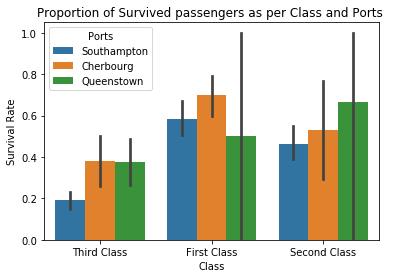

In [203]:
#Survived Passenger based on Embarked Port and Pclass
print passenger_survived_df['Embarked'].value_counts()
sns.barplot(x='Class', y='Survived', hue = "Ports" ,data=titanic_df)

plt.ylabel('Survival Rate')
plt.title('Proportion of Survived passengers as per Class and Ports ')
#sns.countplot(x="Embarked", data=titanic_df)

Look like passengers from Chebourgh have better chance of survival than others because of their economic status as Chebourgh people have 
brought the first class tickets more in proportion.

## 6.Survival based on Cabin

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64

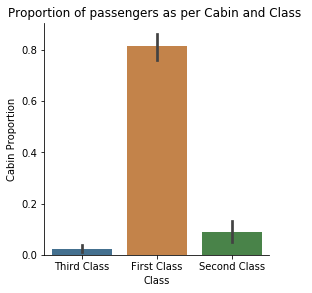

In [204]:
sns.factorplot(x="Class", y="Has_Cabin", data=titanic_df, saturation=.5, kind="bar")

plt.ylabel('Cabin Proportion')
plt.title('Proportion of passengers as per Cabin and Class ')
titanic_df.groupby(['Pclass'])['Cabin'].count()

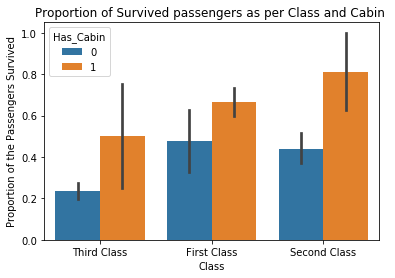

In [205]:
sns.barplot(x='Class', y='Survived', hue = "Has_Cabin" ,data=titanic_df)
plt.xlabel('Class', fontsize=10)
plt.ylabel('Proportion of the Passengers Survived')
plt.title('Proportion of Survived passengers as per Class and Cabin ')

From the above two plottings it is very clear that the first cass passengers has cabin adn they have a better chance of survival

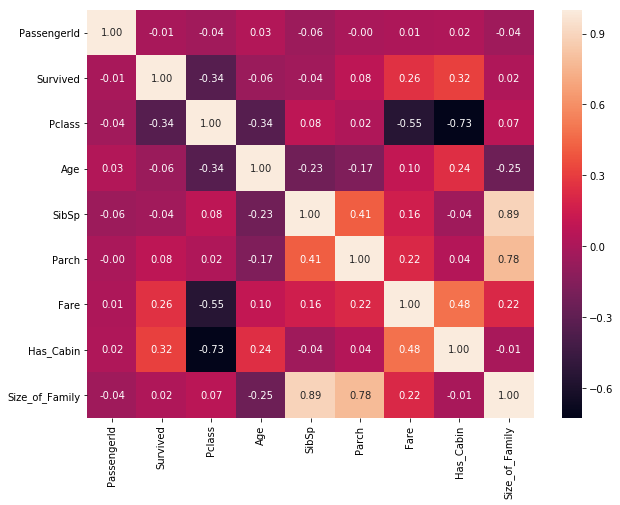

In [206]:
## Correlation among the features of titanic dataset
titanic_corr = titanic_df.corr(method='pearson')
plt.figure(figsize=(10,7.5))
sns.heatmap(titanic_corr, annot=True, fmt=".2f")

# Conclusion
Overall analysis leads to the conclusion that economic status,Sex and Size_of_family played an important role in the survival.
Age did not seem to be a major factor.

## Key Conclusions
- First class passengers had a better chance of survival than the other class 
- Females and children survival rate is better than other.
- Size of family plays an important role in survival
- Passengers from Chebourgh holds better chance of survival than others because of their economic status

## Limitations
- Data misssing from age which might lead to wrong predictions.

There were 177 age missings.Highest single age count was 24 at 30 passengers. After replacing the missing values with the median, age 28 just got an extra 177 values giving it a total of 202 passengers.
When plotting a graph,it will be negatively skewed which might leads to wrong prediction.What if those missing values will be distributed all over or it belongs to a certain range which can lead to a prediction that Age is important factor.

- Cabin columns is missing a lot of data. 

Creating a new boolean column to predict that the passengers has cabin or not provide data can lead to wrong prediction.
Prediction based on only 204 values can be misleading.

It might be possible that passengers from second and third class has cabins that can impact the analysis.

